# BIHAR

In [91]:
import pandas as pd

# Load the datasets for Bihar
df_bi_enrolment = pd.read_csv('/content/Bihar Enrolment State.csv')
df_bi_demographic = pd.read_csv('/content/Bihar Demographic State.csv')
df_bi_biometric = pd.read_csv('/content/Bihar Biometric State.csv')

print("Bihar Enrolment Dataset:")
print(df_bi_enrolment.head())
print(df_bi_enrolment.info())
print(df_bi_enrolment.describe())

print("\nBihar Demographic Dataset:")
print(df_bi_demographic.head())
print(df_bi_demographic.info())
print(df_bi_demographic.describe())

print("\nBihar Biometric Dataset:")
print(df_bi_biometric.head())
print(df_bi_biometric.info())
print(df_bi_biometric.describe())

Bihar Enrolment Dataset:
         date  state district  pincode  age_0_5  age_5_17  age_18_greater
0  01-09-2025  Bihar   Araria   854318       30        19               0
1  01-09-2025  Bihar   Araria   854329       21         2               0
2  01-09-2025  Bihar   Araria   854333       17         3               0
3  01-09-2025  Bihar   Araria   854334        5        10               0
4  01-09-2025  Bihar    Arwal   804401        1        11               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72866 entries, 0 to 72865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            72866 non-null  object
 1   state           72866 non-null  object
 2   district        72866 non-null  object
 3   pincode         72866 non-null  int64 
 4   age_0_5         72866 non-null  int64 
 5   age_5_17        72866 non-null  int64 
 6   age_18_greater  72866 non-null  int64 
dtypes: int64(4), object(3)

In [92]:
df_bi_enrolment['date'] = pd.to_datetime(df_bi_enrolment['date'], format='%d-%m-%Y')
df_bi_demographic['date'] = pd.to_datetime(df_bi_demographic['date'], format='%d-%m-%Y')
df_bi_biometric['date'] = pd.to_datetime(df_bi_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_bi_enrolment:")
print(df_bi_enrolment.info())
print("\nData types after conversion for df_bi_demographic:")
print(df_bi_demographic.info())
print("\nData types after conversion for df_bi_biometric:")
print(df_bi_biometric.info())

Data types after conversion for df_bi_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72866 entries, 0 to 72865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            72866 non-null  datetime64[ns]
 1   state           72866 non-null  object        
 2   district        72866 non-null  object        
 3   pincode         72866 non-null  int64         
 4   age_0_5         72866 non-null  int64         
 5   age_5_17        72866 non-null  int64         
 6   age_18_greater  72866 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.9+ MB
None

Data types after conversion for df_bi_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105672 entries, 0 to 105671
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           105672 non-null

In [93]:
merged_bi_df_temp = pd.merge(df_bi_enrolment, df_bi_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_bi_merged = pd.merge(merged_bi_df_temp, df_bi_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_bi_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_bi_merged[numeric_cols] = df_bi_merged[numeric_cols].fillna(0)

print("Merged Bihar DataFrame (df_bi_merged) head:")
print(df_bi_merged.head())
print("\nMerged Bihar DataFrame (df_bi_merged) info:")
print(df_bi_merged.info())

Merged Bihar DataFrame (df_bi_merged) head:
        date  state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Bihar   Araria   854102      0.0       0.0             0.0   
1 2025-03-01  Bihar   Araria   854201      0.0       0.0             0.0   
2 2025-03-01  Bihar   Araria   854201      0.0       0.0             0.0   
3 2025-03-01  Bihar   Araria   854202      0.0       0.0             0.0   
4 2025-03-01  Bihar   Araria   854202      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0           24.0         276.0           0.0          0.0  
1           14.0         260.0         103.0        120.0  
2           14.0         260.0         103.0        120.0  
3           30.0         289.0         137.0        218.0  
4           30.0         289.0         137.0        218.0  

Merged Bihar DataFrame (df_bi_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301692 entries, 0 to 301691
Data columns (to

In [94]:
df_bi = df_bi_merged[df_bi_merged['state'] == 'Bihar'].copy()
df_bi['year'] = df_bi['date'].dt.year
df_bi['month'] = df_bi['date'].dt.month

print("Shape of df_bi:", df_bi.shape)
print("\nFirst 5 rows of df_bi with new 'year' and 'month' columns:")
print(df_bi.head())

Shape of df_bi: (301692, 13)

First 5 rows of df_bi with new 'year' and 'month' columns:
        date  state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Bihar   Araria   854102      0.0       0.0             0.0   
1 2025-03-01  Bihar   Araria   854201      0.0       0.0             0.0   
2 2025-03-01  Bihar   Araria   854201      0.0       0.0             0.0   
3 2025-03-01  Bihar   Araria   854202      0.0       0.0             0.0   
4 2025-03-01  Bihar   Araria   854202      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0           24.0         276.0           0.0          0.0  2025      3  
1           14.0         260.0         103.0        120.0  2025      3  
2           14.0         260.0         103.0        120.0  2025      3  
3           30.0         289.0         137.0        218.0  2025      3  
4           30.0         289.0         137.0        218.0  2025      3  


In [95]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_bi_agg = df_bi.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_bi_agg) head:")
print(df_bi_agg.head())
print("\nAggregated DataFrame (df_bi_agg) info:")
print(df_bi_agg.info())

Aggregated DataFrame (df_bi_agg) head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Bihar      Araria      0.0       0.0             0.0   
1  2025      3  Bihar       Arwal      0.0       0.0             0.0   
2  2025      3  Bihar  Aurangabad      0.0       0.0             0.0   
3  2025      3  Bihar       Banka      0.0       0.0             0.0   
4  2025      3  Bihar   Begusarai      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0         3338.0       38434.0       14166.0      14871.0  
1          698.0        7469.0        1359.0       3386.0  
2         3123.0       27017.0        6733.0       8541.0  
3         1741.0       19286.0        3884.0       4611.0  
4         5649.0       43818.0       20693.0      18676.0  

Aggregated DataFrame (df_bi_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column          No

In [96]:
import numpy as np

# 1. Create 'totalenrolments' column
df_bi_agg['totalenrolments'] = df_bi_agg['age_0_5'] + df_bi_agg['age_5_17'] + df_bi_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_bi_agg['childenrolments'] = df_bi_agg['age_0_5'] + df_bi_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_bi_agg['totaldemoupdates'] = df_bi_agg['demo_age_5_17'] + df_bi_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_bi_agg['totalbioupdates'] = df_bi_agg['bio_age_5_17'] + df_bi_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_bi_agg['CES'] = np.where(
    df_bi_agg['totalenrolments'] == 0,
    0,
    df_bi_agg['childenrolments'] / df_bi_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_bi_agg['DUR'] = np.where(
    df_bi_agg['totalenrolments'] == 0,
    0,
    df_bi_agg['totaldemoupdates'] / df_bi_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_bi_agg['BUR'] = np.where(
    df_bi_agg['totalenrolments'] == 0,
    0,
    df_bi_agg['totalbioupdates'] / df_bi_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_bi_agg) with new metrics head:")
print(df_bi_agg.head())

Aggregated DataFrame (df_bi_agg) with new metrics head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Bihar      Araria      0.0       0.0             0.0   
1  2025      3  Bihar       Arwal      0.0       0.0             0.0   
2  2025      3  Bihar  Aurangabad      0.0       0.0             0.0   
3  2025      3  Bihar       Banka      0.0       0.0             0.0   
4  2025      3  Bihar   Begusarai      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0         3338.0       38434.0       14166.0      14871.0              0.0   
1          698.0        7469.0        1359.0       3386.0              0.0   
2         3123.0       27017.0        6733.0       8541.0              0.0   
3         1741.0       19286.0        3884.0       4611.0              0.0   
4         5649.0       43818.0       20693.0      18676.0              0.0   

   childenrolments  totaldemoupdates  tota

In [97]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_bi_agg['Enorm'] = df_bi_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_bi_agg['Dnorm'] = df_bi_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_bi_agg['Bnorm'] = df_bi_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_bi_agg['stdnorm'] = (df_bi_agg['Enorm'] + df_bi_agg['Dnorm'] + df_bi_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_bi_agg['ALBI'] = 1 - df_bi_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_bi_agg['ALBI'] = df_bi_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_bi_agg) with normalized metrics and ALBI head:")
print(df_bi_agg.head())

Aggregated DataFrame (df_bi_agg) with normalized metrics and ALBI head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Bihar      Araria      0.0       0.0             0.0   
1  2025      3  Bihar       Arwal      0.0       0.0             0.0   
2  2025      3  Bihar  Aurangabad      0.0       0.0             0.0   
3  2025      3  Bihar       Banka      0.0       0.0             0.0   
4  2025      3  Bihar   Begusarai      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0         3338.0       38434.0       14166.0  ...           41772.0   
1          698.0        7469.0        1359.0  ...            8167.0   
2         3123.0       27017.0        6733.0  ...           30140.0   
3         1741.0       19286.0        3884.0  ...           21027.0   
4         5649.0       43818.0       20693.0  ...           49467.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm     Bnorm   stdno

In [98]:
df_bi_agg['Enormrisk'] = 1 - df_bi_agg['Enorm']
df_bi_agg['CESrisknorm'] = 1 - df_bi_agg['CES']
df_bi_agg['DURrisknorm'] = 1 - df_bi_agg['DUR']
df_bi_agg['BURrisknorm'] = 1 - df_bi_agg['BUR']
df_bi_agg['ALBIrisknorm'] = 1 - df_bi_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_bi_agg['riskscore'] = (
    df_bi_agg['Enormrisk'] +
    df_bi_agg['CESrisknorm'] +
    df_bi_agg['DURrisknorm'] +
    df_bi_agg['BURrisknorm'] +
    df_bi_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_bi_agg) with risk components and riskscore head:")
print(df_bi_agg.head())

Aggregated DataFrame (df_bi_agg) with risk components and riskscore head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Bihar      Araria      0.0       0.0             0.0   
1  2025      3  Bihar       Arwal      0.0       0.0             0.0   
2  2025      3  Bihar  Aurangabad      0.0       0.0             0.0   
3  2025      3  Bihar       Banka      0.0       0.0             0.0   
4  2025      3  Bihar   Begusarai      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0         3338.0       38434.0       14166.0  ...  0.477405  0.607253   
1          698.0        7469.0        1359.0  ...  0.093339  0.099232   
2         3123.0       27017.0        6733.0  ...  0.344465  0.319426   
3         1741.0       19286.0        3884.0  ...  0.240314  0.177656   
4         5649.0       43818.0       20693.0  ...  0.565350  0.823326   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisk

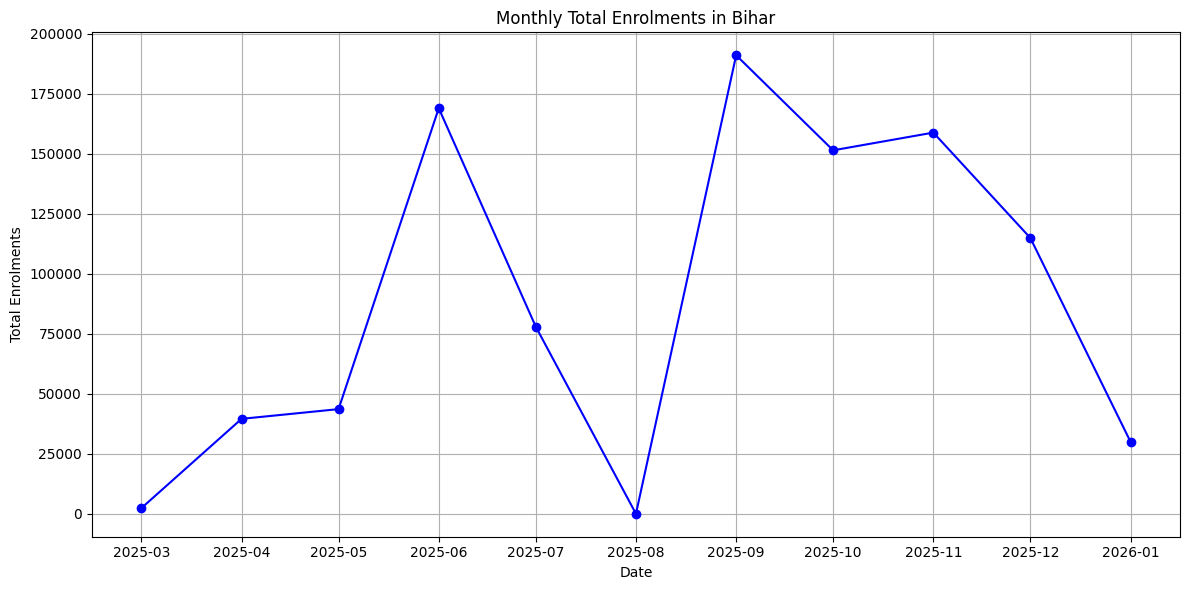

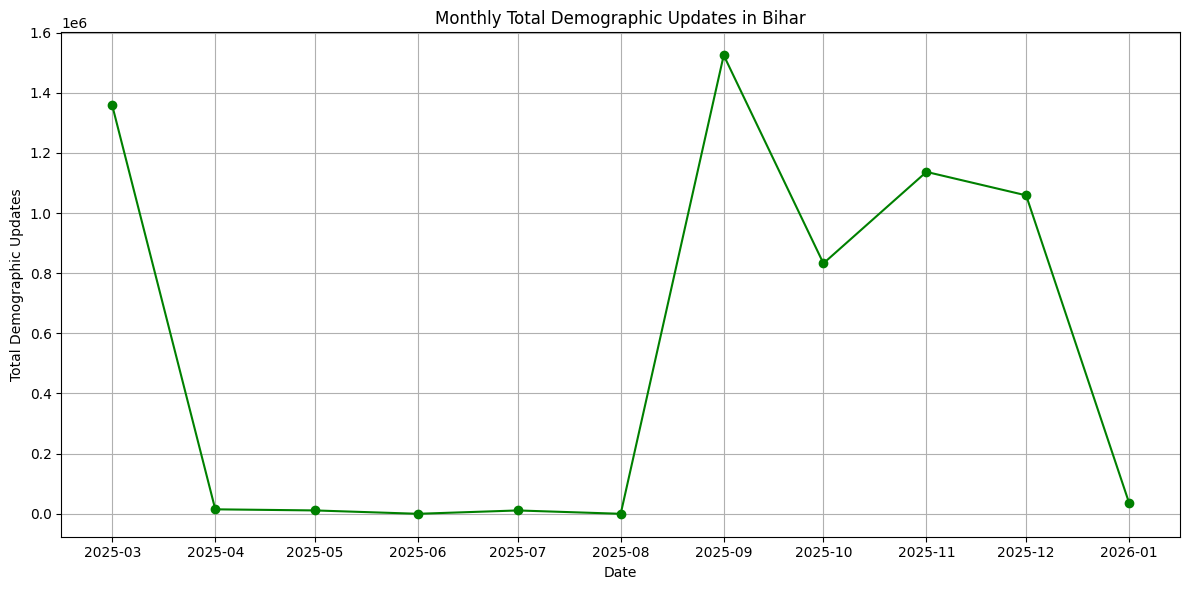

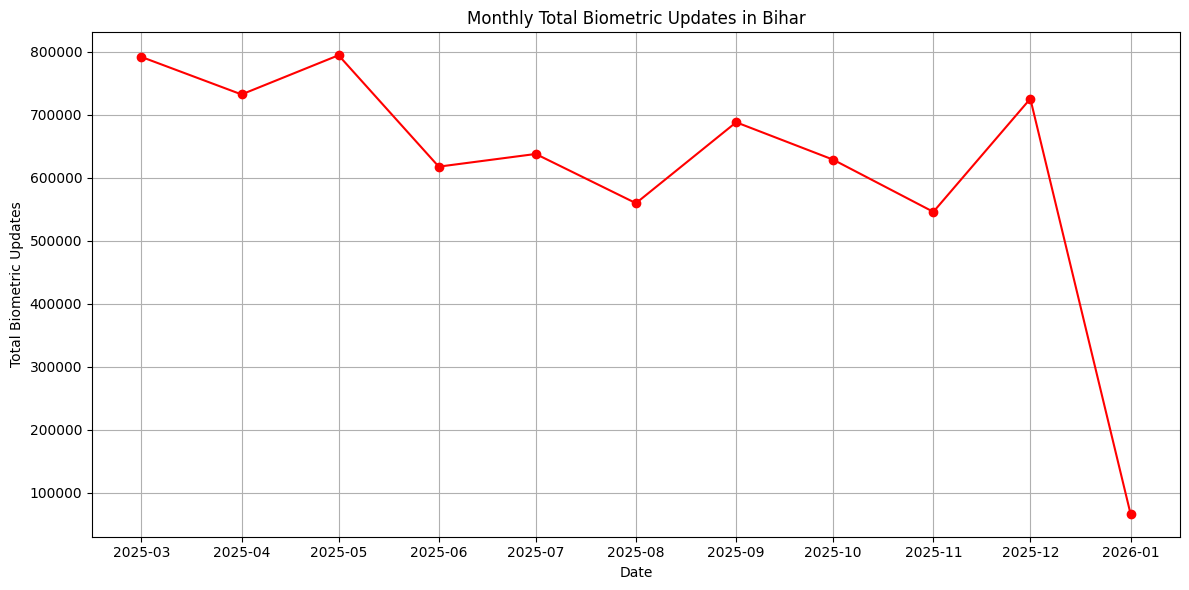

Monthly trend plots generated successfully.


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

df_bi_monthly_trends = df_bi_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_bi_monthly_trends['date'] = pd.to_datetime(df_bi_monthly_trends['year'].astype(str) + '-' + df_bi_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_bi_monthly_trends = df_bi_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_bi_monthly_trends['date'], df_bi_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Bihar')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_bi_monthly_trends['date'], df_bi_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Bihar')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_bi_monthly_trends['date'], df_bi_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Bihar')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

### UNIVARIATE ANALYSIS

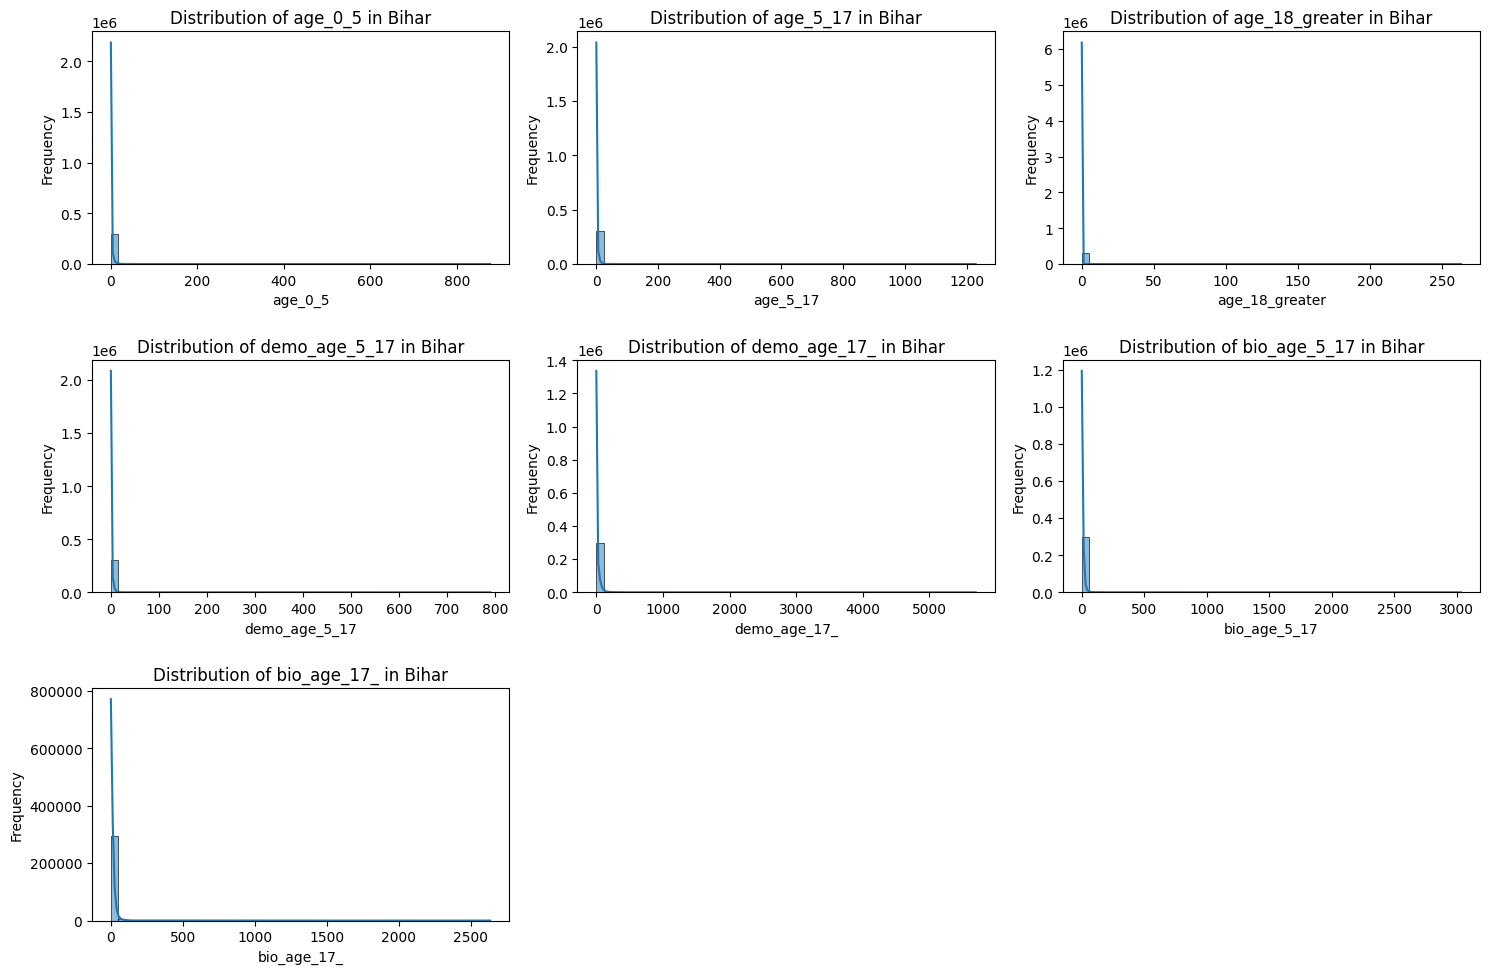

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_bi_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Bihar')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

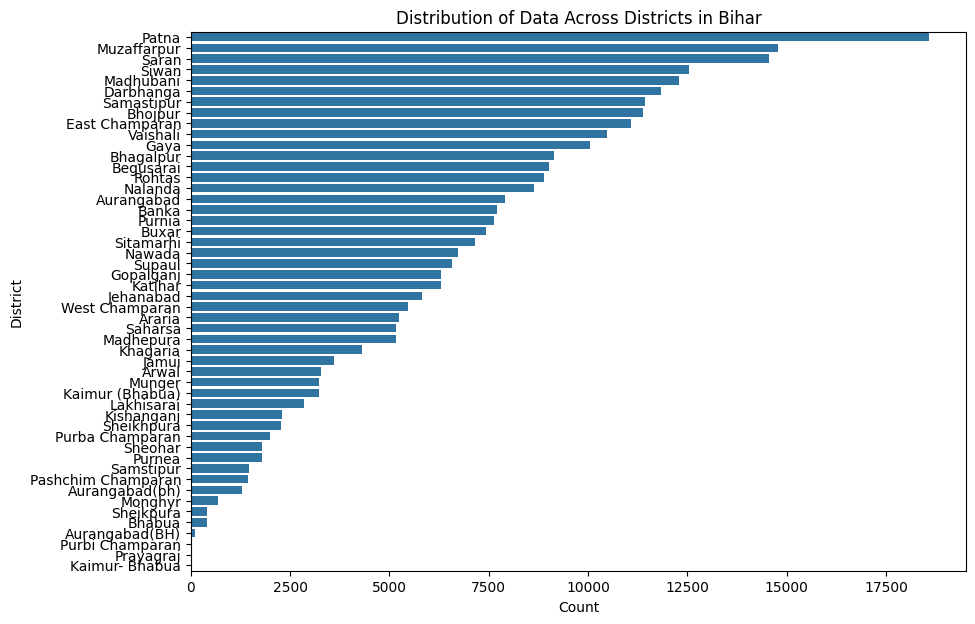

Histograms for numerical age-related columns and count plot for 'district' displayed for Bihar.


In [110]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_bi_merged, y='district', order=df_bi_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Bihar')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Bihar.")

### BIVARIATE AND TRIVARIATE ANALYSIS

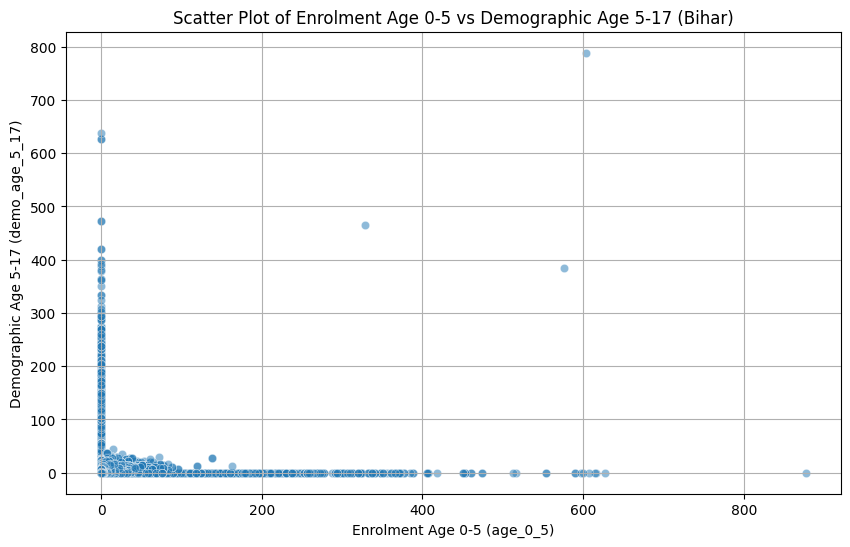

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Bihar.


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bi_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Bihar)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Bihar.")

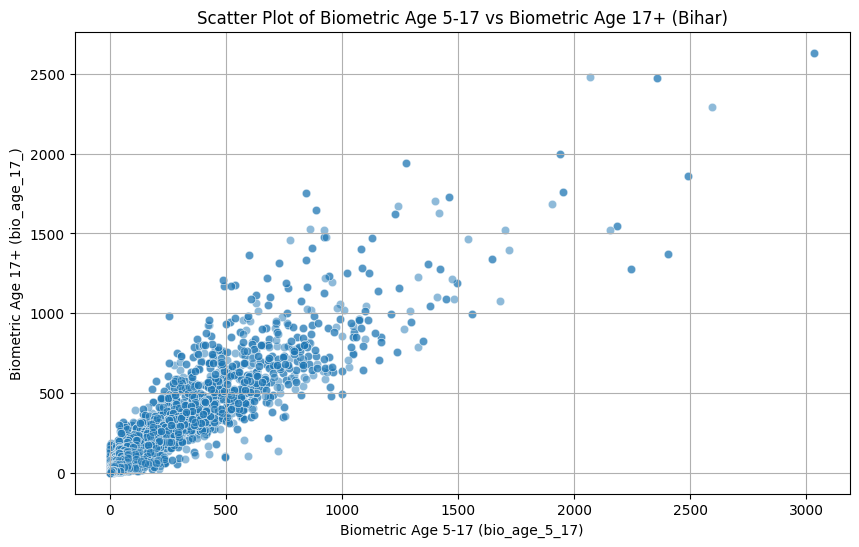

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Bihar.


In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bi_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Bihar)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Bihar.")

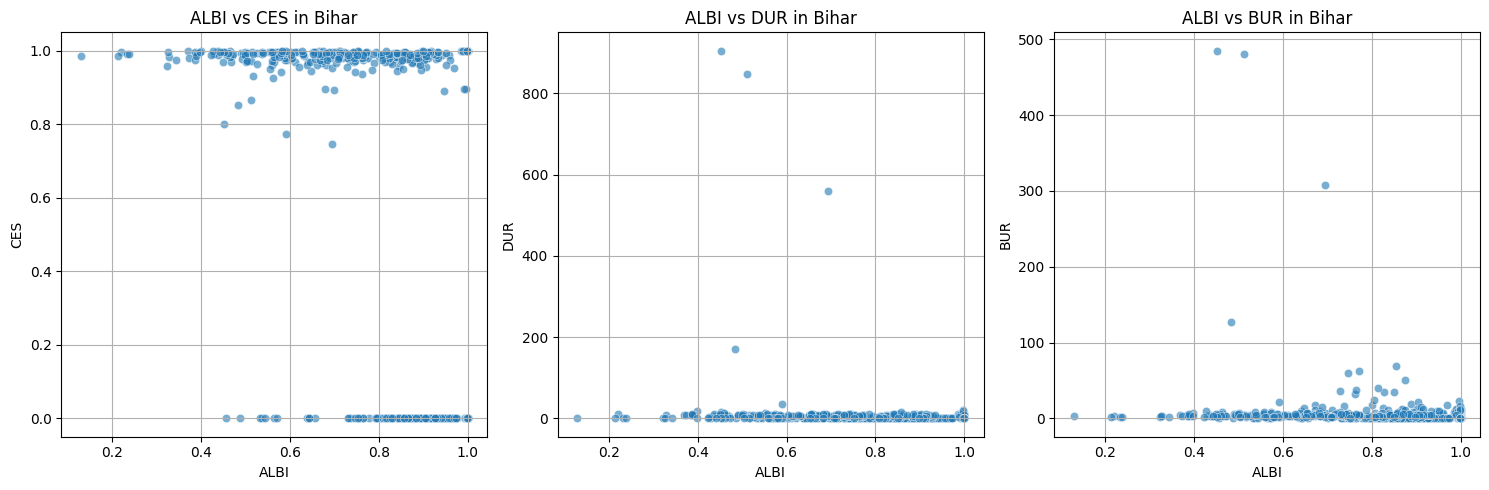

In [113]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_bi_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Bihar')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

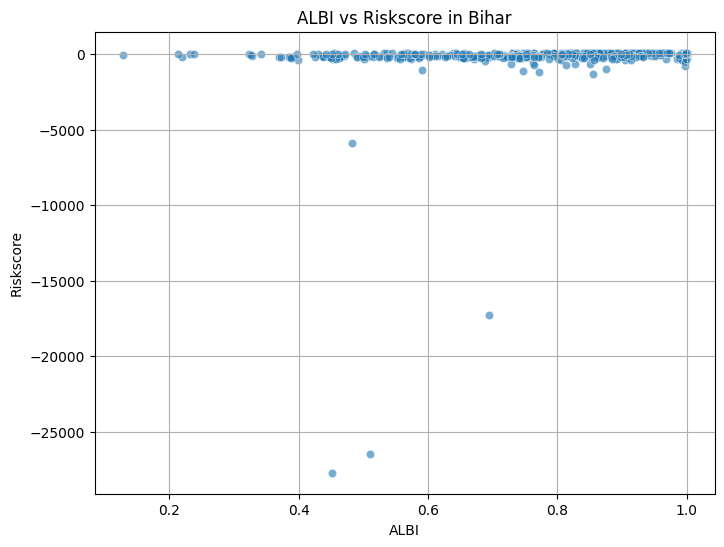

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Bihar.


In [112]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_bi_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Bihar')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Bihar.")

Correlation Matrix for Bihar:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.831576        0.575842       0.057853   
age_5_17        0.831576  1.000000        0.596635       0.040629   
age_18_greater  0.575842  0.596635        1.000000       0.009395   
demo_age_5_17   0.057853  0.040629        0.009395       1.000000   
demo_age_17_    0.069299  0.040946        0.007897       0.934196   
bio_age_5_17    0.139609  0.108031        0.071197       0.428645   
bio_age_17_     0.120876  0.091831        0.057445       0.514067   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.069299      0.139609     0.120876  
age_5_17            0.040946      0.108031     0.091831  
age_18_greater      0.007897      0.071197     0.057445  
demo_age_5_17       0.934196      0.428645     0.514067  
demo_age_17_        1.000000      0.421309     0.522337  
bio_age_5_17        0.421309      1.000000     0.929929  
bio_age_17_

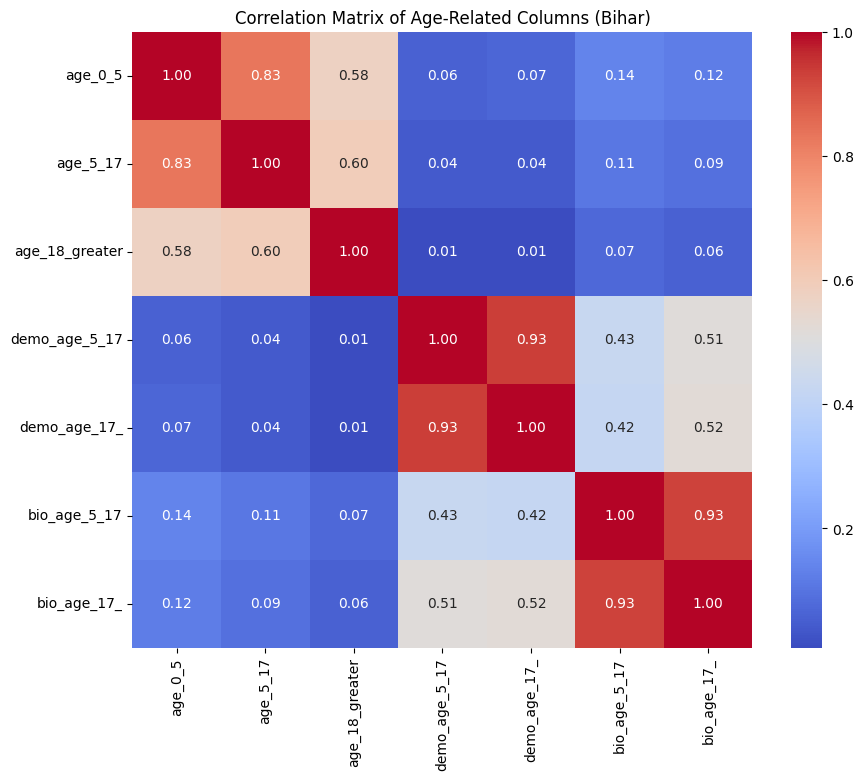

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables in Bihar, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [104]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_bi = df_bi_merged[numerical_age_cols].corr()

print("Correlation Matrix for Bihar:")
print(correlation_matrix_bi)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_bi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Bihar)')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables in Bihar, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

District-wise average age-related data for Bihar:
         district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0          Araria  3.052240  1.814490        0.049190       1.779028   
1           Arwal  0.364472  1.411332        0.013783       0.764472   
2      Aurangabad  0.618559  1.643879        0.017597       1.436638   
3  Aurangabad(BH)  0.050505  0.040404        0.000000       0.030303   
4  Aurangabad(bh)  0.043445  0.079907        0.000000       0.017843   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0     34.340133     16.148904    23.154051  
1      9.687289      4.462175     8.272282  
2     14.789594      7.899608    10.354475  
3      0.262626      0.030303     0.717172  
4      0.633825      0.058960     1.059736  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        50 non-null     object 
 1   age_0

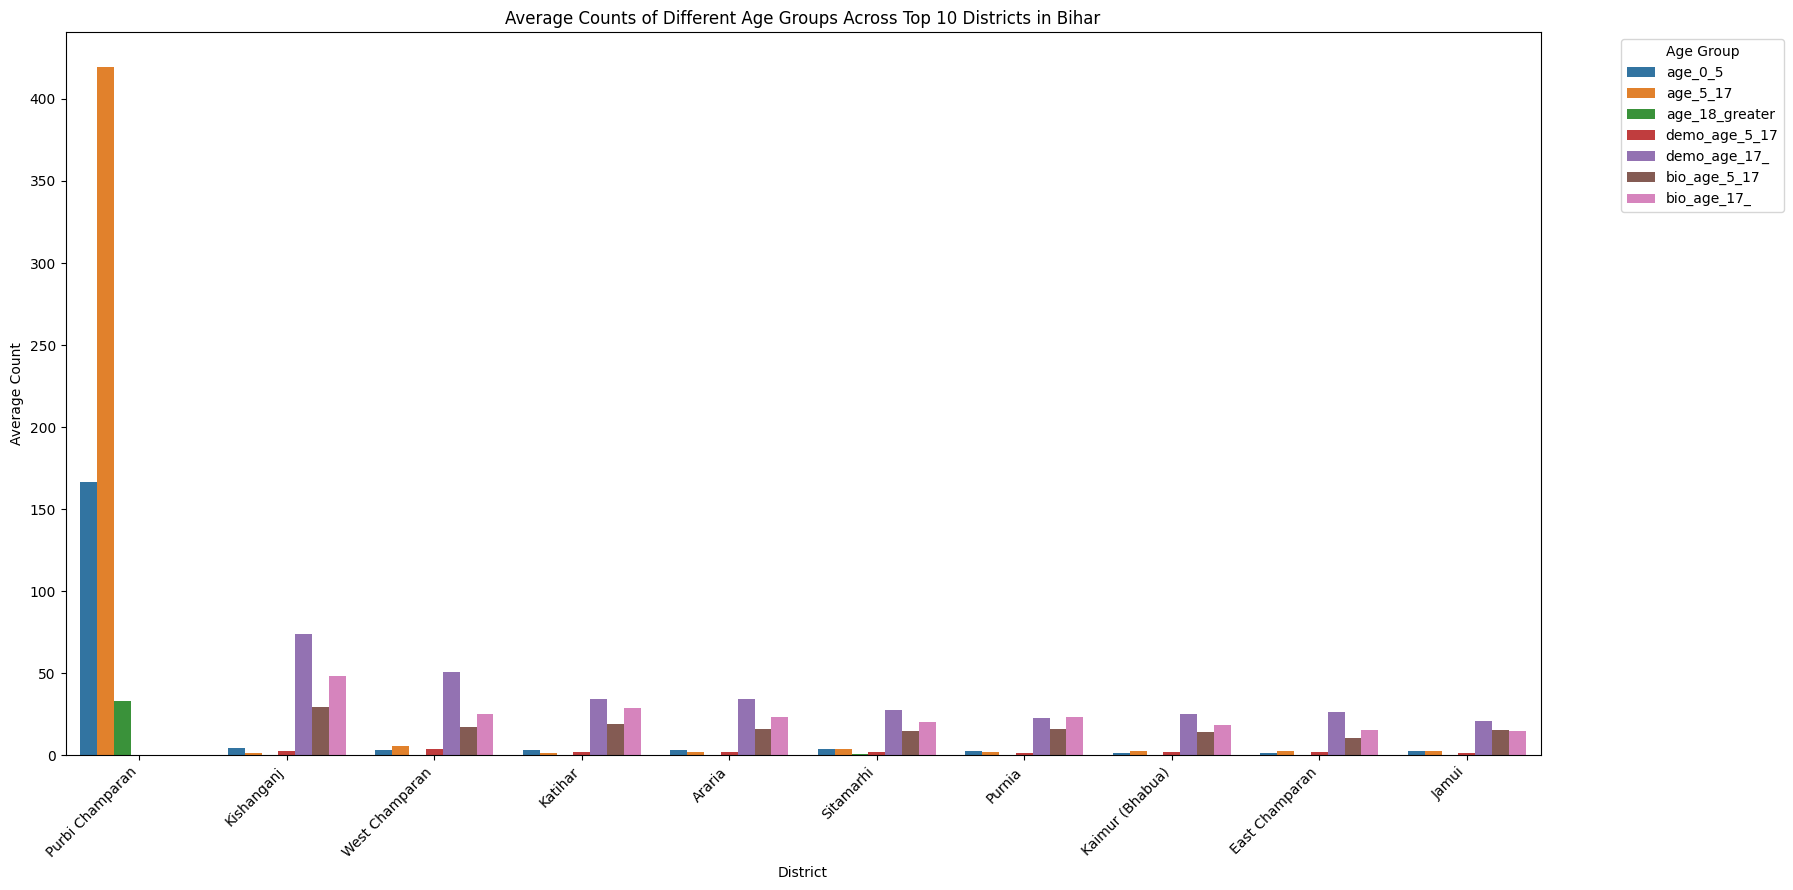

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Bihar, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [105]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_bi_district_mean = df_bi_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Bihar:")
print(df_bi_district_mean.head())
print(df_bi_district_mean.info())

df_bi_district_mean['total_avg_age'] = df_bi_district_mean[age_cols_to_group].sum(axis=1)
df_bi_district_mean_top10 = df_bi_district_mean.nlargest(10, 'total_avg_age')

df_bi_district_mean_melted = df_bi_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_bi_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts in Bihar')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Bihar, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Bihar:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0       120174.0     1237419.0   
1 2025-03-09    206.0     633.0           166.0            0.0           0.0   
2 2025-03-15     69.0     292.0            87.0            0.0           0.0   
3 2025-03-20     63.0     119.0            65.0            0.0           0.0   
4 2025-03-23     34.0      41.0            10.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0      338617.0     453037.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            236 non-null    datetime64[

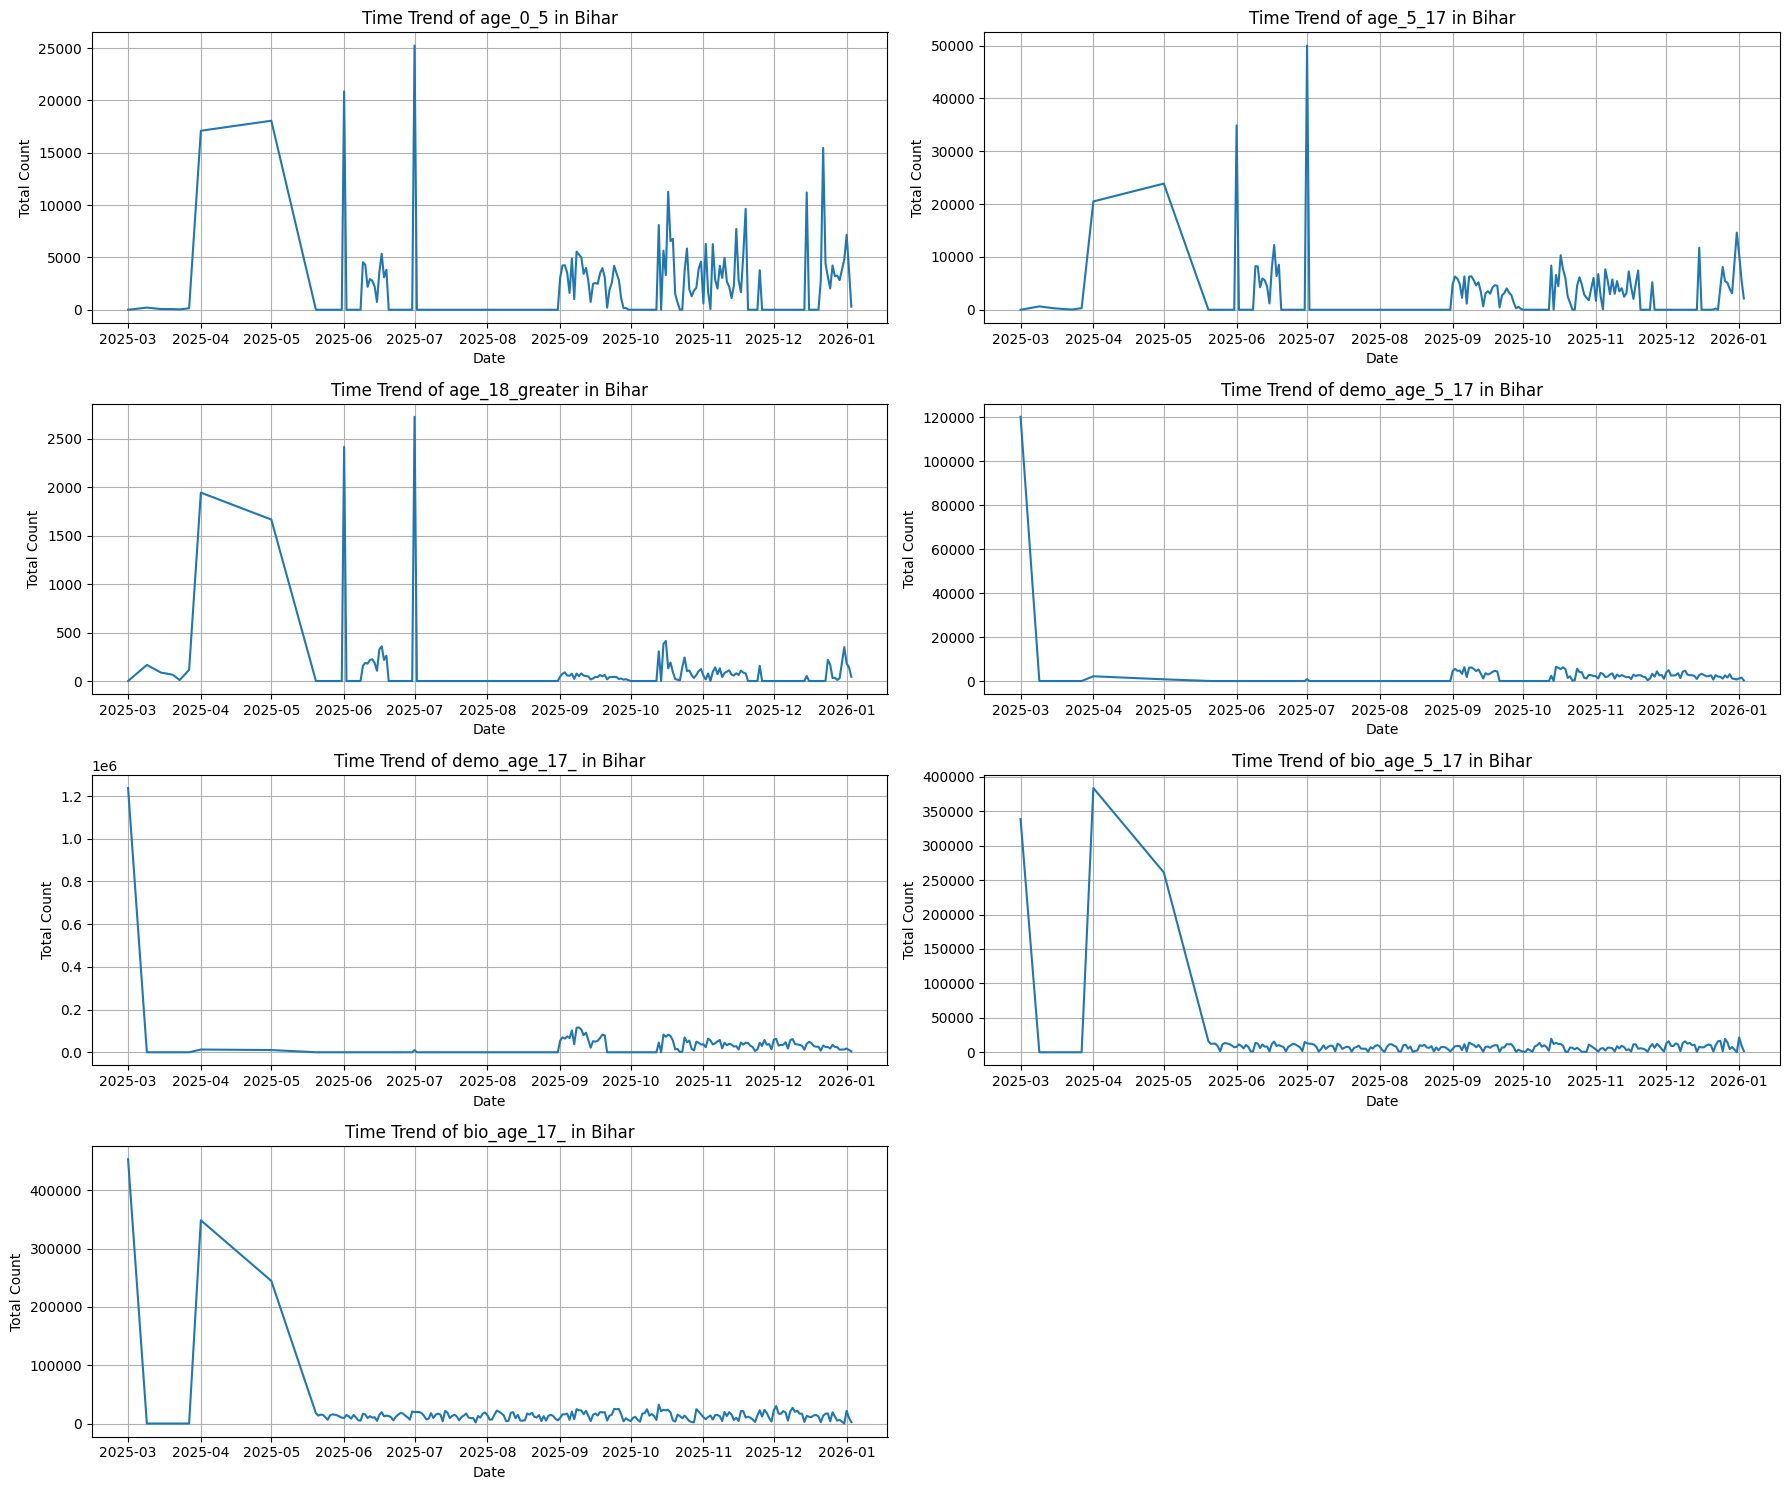

Insight: Line charts for each age-related column over time in Bihar provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [106]:
df_bi_time_trend = df_bi_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Bihar:")
print(df_bi_time_trend.head())
print(df_bi_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_bi_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Bihar')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Bihar provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

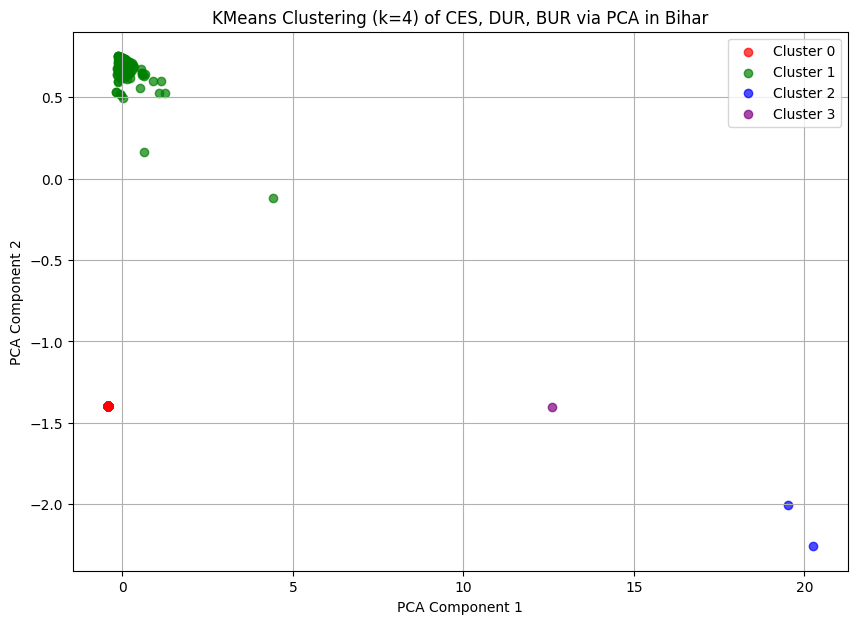

First 5 rows of df_bi_agg with 'clusterlabel' column after clustering:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Bihar      Araria      0.0       0.0             0.0   
1  2025      3  Bihar       Arwal      0.0       0.0             0.0   
2  2025      3  Bihar  Aurangabad      0.0       0.0             0.0   
3  2025      3  Bihar       Banka      0.0       0.0             0.0   
4  2025      3  Bihar   Begusarai      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0         3338.0       38434.0       14166.0  ...  0.607253  0.361553   
1          698.0        7469.0        1359.0  ...  0.099232  0.064191   
2         3123.0       27017.0        6733.0  ...  0.319426  0.221297   
3         1741.0       19286.0        3884.0  ...  0.177656  0.139324   
4         5649.0       43818.0       20693.0  ...  0.823326  0.462892   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisk

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering_bi = df_bi_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler_bi = StandardScaler()
scaled_features_bi = scaler_bi.fit_transform(features_for_clustering_bi)

# 3. Apply KMeans clustering
kmeans_bi = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_bi.fit(scaled_features_bi)

# 4. Add the cluster labels to df_bi_agg
df_bi_agg['clusterlabel'] = kmeans_bi.labels_

# 5. Apply PCA for dimensionality reduction
pca_bi = PCA(n_components=2, random_state=42)
pca_components_bi = pca_bi.fit_transform(scaled_features_bi)

# Create a DataFrame for PCA components for easier plotting
pca_df_bi = pd.DataFrame(data=pca_components_bi, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_bi['clusterlabel'] = df_bi_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df_bi[pca_df_bi['clusterlabel'] == i]['PCA Component 1'],
        pca_df_bi[pca_df_bi['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA in Bihar')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_bi_agg with 'clusterlabel' column after clustering:")
print(df_bi_agg.head())

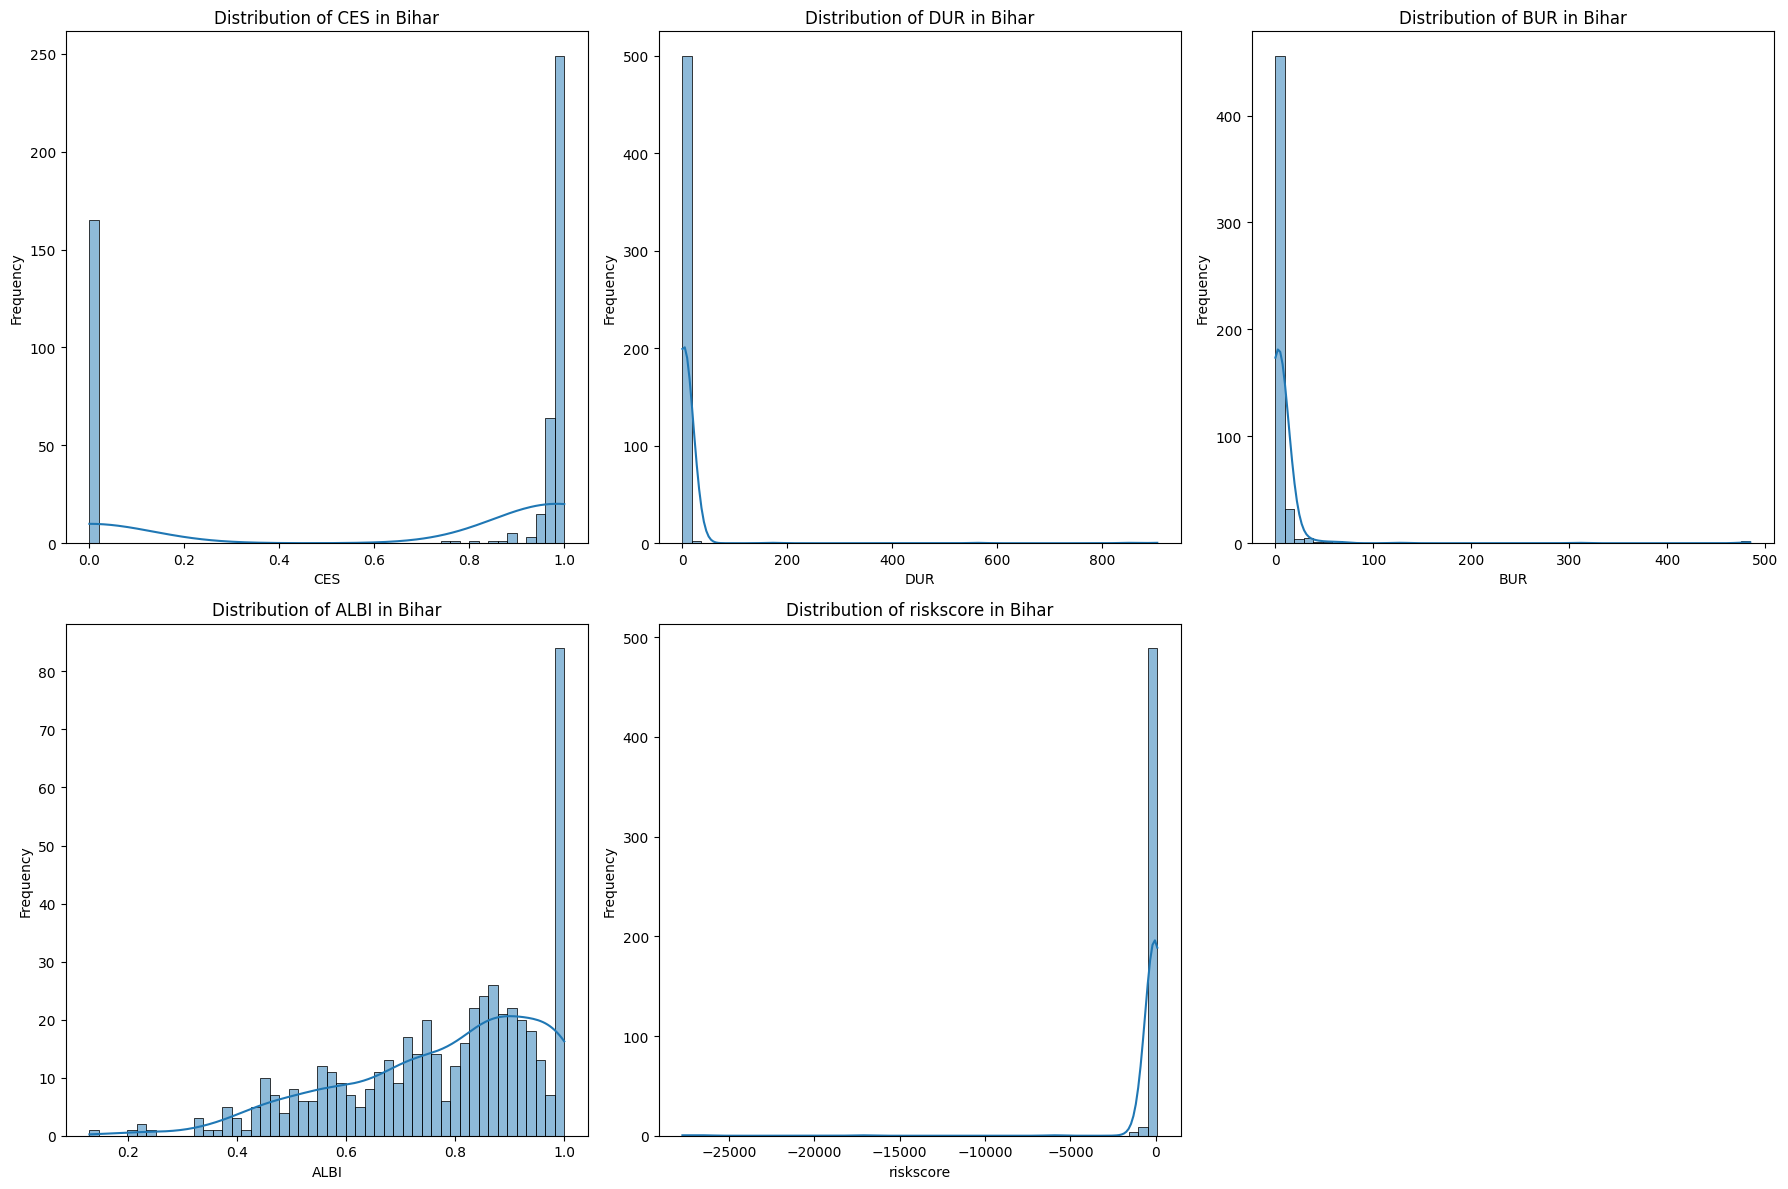

Histograms for CES, DUR, BUR, ALBI, and riskscore in Bihar displayed.


In [108]:
metrics_to_plot_bi = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot_bi):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_bi_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Bihar')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in Bihar displayed.")

In [109]:
import pandas as pd

# 1. Find the latest year and month
latest_year_bi = df_bi_agg['year'].max()
latest_month_bi = df_bi_agg[df_bi_agg['year'] == latest_year_bi]['month'].max()

print(f"Latest reporting period for Bihar: Year {latest_year_bi}, Month {latest_month_bi}")

# 2. Filter df_bi_agg for the latest year and month
df_latest_month_bi = df_bi_agg[(df_bi_agg['year'] == latest_year_bi) & (df_bi_agg['month'] == latest_month_bi)].copy()

# Metrics to analyze
metrics_bi = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_bi:
    print(f"\n--- Metric: {metric} ---")

    # For riskscore, top 10 implies highest risk, so ascending=False
    if metric == 'riskscore':
        top_10_bi = df_latest_month_bi.sort_values(by=metric, ascending=False).head(10)
        bottom_10_bi = df_latest_month_bi.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_bi}, Month {latest_month_bi}):")
        print(top_10_bi[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_bi}, Month {latest_month_bi}):")
        print(bottom_10_bi[['district', metric]].to_string(index=False))
    # For ALBI, top 10 implies best balance, so ascending=False
    elif metric == 'ALBI':
        top_10_bi = df_latest_month_bi.sort_values(by=metric, ascending=False).head(10)
        bottom_10_bi = df_latest_month_bi.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_bi}, Month {latest_month_bi}):")
        print(top_10_bi[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_bi}, Month {latest_month_bi}):")
        print(bottom_10_bi[['district', metric]].to_string(index=False))
    # For CES, DUR, BUR, top 10 implies best performance, so ascending=False
    else:
        top_10_bi = df_latest_month_bi.sort_values(by=metric, ascending=False).head(10)
        bottom_10_bi = df_latest_month_bi.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_bi}, Month {latest_month_bi}):")
        print(top_10_bi[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_bi}, Month {latest_month_bi}):")
        print(bottom_10_bi[['district', metric]].to_string(index=False))

Latest reporting period for Bihar: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
          district      CES
    Aurangabad(bh) 1.000000
         Samstipur 1.000000
           Sheohar 1.000000
           Monghyr 1.000000
Pashchim Champaran 1.000000
        Kishanganj 1.000000
   Kaimur (Bhabua) 1.000000
   Purba Champaran 1.000000
            Purnea 1.000000
         Begusarai 0.998896

Bottom 10 Districts by CES (Year 2026, Month 1):
      district      CES
        Bhabua 0.000000
Kaimur- Bhabua 0.000000
     Sheikpura 0.000000
East Champaran 0.957093
     Sitamarhi 0.973193
    Lakhisarai 0.973941
West Champaran 0.974050
        Supaul 0.974865
        Munger 0.976000
       Saharsa 0.976860

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
          district      DUR
        Kishanganj 2.432258
            Purnea 2.153846
           Sheohar 1.771930
       Muzaffarpur 1.725173
Pashchim Champaran 1.600000
            Rohtas 1

## Summary (Bihar):

The Aadhaar lifecycle analysis for Bihar provides a detailed view of enrolment and update activities across its districts. The `df_bi_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_bi_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0. The data was then filtered for 'Bihar' and aggregated monthly and by district into `df_bi_agg`.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some significantly negative risk scores were observed, such as Kishanganj with -164.85 and Purnea with -70.70, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns in Bihar (`correlation_matrix_bi`) revealed strong positive correlations within demographic (`demo_age_5_17` and `demo_age_17_` at 0.93) and biometric (`bio_age_5_17` and `bio_age_17_` at 0.93) update categories. Correlations between enrolment figures (`age_0_5`, `age_5_17`, `age_18_greater`) and update figures were generally weaker, typically below 0.15.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Districts like Aurangabad(bh), Samstipur, Sheohar, Monghyr, and Pashchim Champaran showed a perfect CES of 1.0, suggesting all enrolments in these areas were for children. Conversely, Bhabua, Kaimur-Bhabua, and Sheikpura had a CES of 0.0.
    *   **DUR (Demographic Update Rate)**: Kishanganj exhibited the highest DUR at 2.43, followed by Purnea at 2.15. Districts like Bhabua, Kaimur-Bhabua, and Sheikpura registered a DUR of 0.0.
    *   **BUR (Biometric Update Rate)**: Kishanganj led in BUR with 9.10, and Purnea followed at 4.38. Bhabua, Kaimur-Bhabua, and Sheikpura showed a BUR of 0.0.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Kaimur-Bhabua achieved an ALBI of 1.00, with Bhabua at 0.999694. Conversely, Madhubani showed a very low ALBI of 0.128261, and Gaya was at 0.213035.
    *   **Risk Score**: Sheikpura had a risk score of 80.01, Bhabua at 80.00, and Kaimur-Bhabua at 80.00. However, some districts like Kishanganj (-164.85), Purnea (-70.70), and Sheikhpura (-38.74) exhibited significantly negative risk scores, highlighting the need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Bihar's districts.

### Conclusion:

Bihar exhibits varied performance across its districts in Aadhaar lifecycle management. While several districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The consistent observation of problematic `riskscore` values across multiple districts necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.